In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import stats
import scipy.stats as sts
import seaborn as sns
from pandas import DataFrame

In [7]:
# read in data file
readcsv = pd.read_csv("Data.csv")
readcsv.head()
sandbox = readcsv.copy()

In [8]:
#-------------------------------------------------------------------------
# CLEAN UP: drop rows with no listing price, no reviews, and no ratings
#-------------------------------------------------------------------------
# filter out rows with no listing price
sandbox.drop(sandbox[sandbox["Listing Price"] == 0].index, inplace = True)
# filter out rows with no reviews
sandbox.drop(sandbox[sandbox["Reviews"] == 0].index, inplace = True)
# filter out rows with no ratings
sandbox.drop(sandbox[sandbox["Rating"] == 0].index, inplace = True)

In [9]:
#-------------------------------------------------------------------------
# ADD COLUMNS: add columns for the two brands (Adidas & Nike) and for gender
#-------------------------------------------------------------------------
# Create blank column for True_Brand and Gender
sandbox['True_Brand']= ""
sandbox['Gender'] = ""
# Fill in True_Brand column with either "Nike" or "Adidas" 
for index, row in sandbox.iterrows():
    Brand_Name = row["Brand"]
    
    if Brand_Name == 'Nike':
        sandbox.loc[[index], "True_Brand"]= "Nike"
    else:
        sandbox.loc[[index], "True_Brand"]= "Adidas"
# Fill in Gender column: Men, Women, Unisex, Unkown
for index, row in sandbox.iterrows():
    if row["Product Name"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Product Name"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Product Name"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      

    elif row["Description"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Description"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Description"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      
    else:
        sandbox.loc[index, "Gender"]= "Unknown"

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,Refine your interval training in these women's...,1.0,45,2020-04-13T15:06:15,Adidas,Women
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,Refine your interval training in these women's...,4.4,2,2020-04-13T15:06:15,Adidas,Women
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.8,7,2020-04-13T15:06:15,Adidas,Women
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,These women's neutral running shoes will get y...,4.5,16,2020-04-13T15:06:15,Adidas,Women
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13T15:06:15,Adidas,Men


In [10]:
#-------------------------------------------------------------------------
# CREATE AVERAGE RATINGS DATA: by True_Brand, and by Gender
#-------------------------------------------------------------------------
# Avergae Adidas shoe rating
adi_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng = adi_rtng_df["Rating"].mean()
# Average Nike shoe rating
nike_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng = nike_rtng_df["Rating"].mean()
# Adidas men's average shoe rating 
adi_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_rtng_man_df = adi_rtng_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng_man = adi_rtng_man_df["Rating"].mean()
# Adidas women's average shoe rating 
adi_rtg_women_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_rtg_women_df = adi_rtg_women_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_women = adi_rtg_women_df["Rating"].mean()
# Adidas unisex average shoe rating 
adi_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_rtg_uni_df = adi_rtg_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_uni = adi_rtg_uni_df["Rating"].mean()
# Adidas unknown gender average shoe rating (adidas has one shoe in this category)
adi_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_rtg_unkn_df = adi_rtg_unkn_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_unkn = adi_rtg_unkn_df["Rating"].mean()
# Nike men's average shoe rating 
nike_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_rtng_man_df = nike_rtng_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_man = nike_rtng_man_df["Rating"].mean()
# Nike women's average shoe rating 
nike_rtng_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_rtng_woman_df = nike_rtng_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_woman = nike_rtng_woman_df["Rating"].mean()
# Nike unisex average shoe rating 
nike_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_rtg_uni_df = nike_rtg_uni_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_uni = nike_rtg_uni_df["Rating"].mean()
# Nike unknown gender average shoe rating (adidas has one shoe in this category)
nike_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_rtg_unkn_df = nike_rtg_unkn_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_unkn = nike_rtg_unkn_df["Rating"].mean()

In [15]:
#-------------------------------------------------------------------------
# CREATE AVERAGE REVIEW COUNTS: by True_Brand, and by Gender
#-------------------------------------------------------------------------
# Average number of reviews Adidas
adi_revw_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw = adi_revw_df["Reviews"].mean()
# Average number of reviews Nike
nike_revw_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_revw = nike_revw_df["Reviews"].mean()
# Adidas men's average review count 
adi_revw_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_revw_man_df = adi_revw_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_man = adi_revw_man_df["Reviews"].mean()
# Adidas women's average review count 
adi_revw_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_revw_woman_df = adi_revw_woman_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_woman = adi_revw_woman_df["Reviews"].mean()
# Adidas unisex average review count 
adi_revw_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_revw_uni_df = adi_revw_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_uni = adi_revw_uni_df["Reviews"].mean()
# Adidas unkown average review count 
adi_revw_unk_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_revw_unk_df = adi_revw_unk_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_unk = adi_revw_unk_df["Reviews"].mean()
# Nike men's average review count 
nike_revw_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_revw_man_df = nike_revw_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_man = nike_revw_man_df["Reviews"].mean()
# Nike women's average review count 
nike_revw_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_revw_woman_df = nike_revw_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_woman = nike_revw_woman_df["Reviews"].mean()
# Nike unisex average review count 
nike_revw_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_revw_uni_df = nike_revw_uni_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_uni = nike_revw_uni_df["Reviews"].mean()
# Nike unknown average review count 
nike_revw_unk_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_revw_unk_df = nike_revw_unk_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_unk = nike_revw_unk_df["Reviews"].mean()

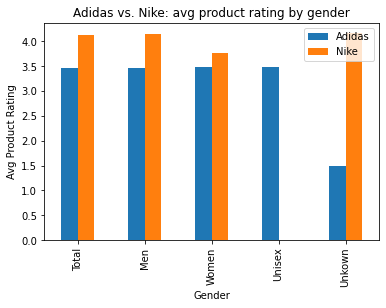

In [22]:
# Plot Ratings Nike vs. Adidas by gender
ratingsplotdata = pd.DataFrame(
    {"Adidas": [adi_rtng, adi_rtng_man, adi_rtg_women, adi_rtg_uni, adi_rtg_unkn],
    "Nike": [nike_rtng, nike_rtng_man, nike_rtng_woman, nike_rtg_uni, nike_rtg_unkn]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
ratingsplotdata.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Avg Product Rating")
plt.title("Adidas vs. Nike: avg product rating by gender");

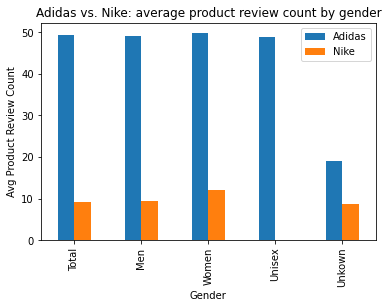

In [21]:
# Plot Reviews Nike vs. Adidas by gender
ratingsplotdata = pd.DataFrame(
    {"Adidas": [adi_revw, adi_revw_man, adi_revw_woman, adi_revw_uni, adi_revw_unk],
    "Nike": [nike_revw, nike_revw_man, nike_revw_woman, nike_revw_uni, nike_revw_unk]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
ratingsplotdata.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Avg Product Review Count")
plt.title("Adidas vs. Nike: average product review count by gender");

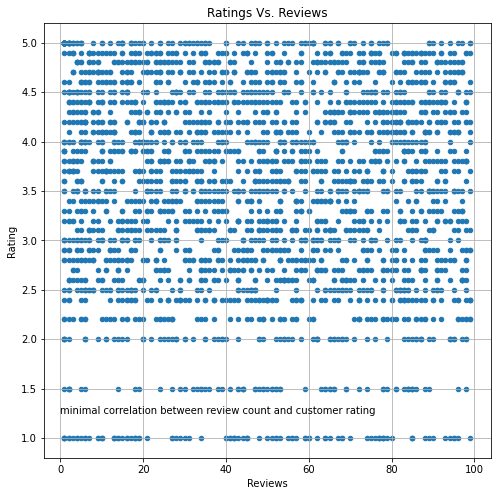

In [27]:
# Create scatter plot for reviews vs rating
sandbox.plot(kind="scatter", x="Reviews", y="Rating", grid=True, figsize=(8,8),
              title="Ratings Vs. Reviews")
plt.annotate("minimal correlation between review count and customer rating", (0,1.25))
plt.show()

In [29]:
# Correlation between avg rating and avg review (Nike)
nike_ratings = nike_rtng_df.iloc[:,7]
nike_reviews = nike_rtng_df.iloc[:,8]
correlation = sts.pearsonr(nike_ratings,nike_reviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.03
